<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/F9_Power_Tranformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Detailed Explanation of `PowerTransformer` in Scikit-learn

The `PowerTransformer` is a powerful preprocessing technique used to transform features to a more Gaussian (normal) distribution. Many statistical models and machine learning algorithms perform best or rely on the assumption that input variables have a Gaussian distribution. Transforming skewed data to be more Gaussian can lead to improved model performance, better convergence, and more robust statistical inferences.

### Core Idea: Power Transforms

The fundamental concept behind a power transform is to apply a mathematical function to your data that compresses or expands values in a way that reduces skewness. The two primary power transformation methods implemented in `PowerTransformer` are:

1.  **Yeo-Johnson Transformation**
    *   **Versatility:** This is the default and most flexible method. Unlike Box-Cox, the Yeo-Johnson transformation can be applied to data that contains **zero, positive, and negative values**. This makes it suitable for a wide range of datasets.
    *   **Formula:** The transformation is defined piecewise:
        *   For $y \ge 0$: $y^{(\lambda)} = \frac{(y+1)^\lambda - 1}{\lambda}$ if $\lambda \ne 0$, and $y^{(\lambda)} = \log(y+1)$ if $\lambda = 0$.
        *   For $y < 0$: $y^{(\lambda)} = \frac{-(|y|+1)^{2-\lambda} + 1}{2-\lambda}$ if $\lambda \ne 2$, and $y^{(\lambda)} = -\log(|y|+1)$ if $\lambda = 2$.
    *   **How $\lambda$ is found:** The optimal $\lambda$ (lambda) value for each feature is estimated using maximum likelihood estimation. This means the transformer finds the $\lambda$ that maximizes the log-likelihood function of the transformed data, assuming a Gaussian distribution.
    *   **Benefits:** It helps stabilize variance, makes the data more symmetric, and reduces the influence of extreme values.

2.  **Box-Cox Transformation**
    *   **Limitation:** This transformation can **only be applied to strictly positive data**. If your data contains zero or negative values, you cannot use the Box-Cox method directly without some prior manipulation (e.g., adding a constant to shift all values to positive).
    *   **Formula:** The transformation is defined as:
        *   $y^{(\lambda)} = \frac{y^\lambda - 1}{\lambda}$ if $\lambda \ne 0$
        *   $y^{(\lambda)} = \log(y)$ if $\lambda = 0$
    *   **How $\lambda$ is found:** Similar to Yeo-Johnson, the optimal $\lambda$ is estimated using maximum likelihood estimation.
    *   **Benefits:** Effective for transforming positively skewed data to a more normal distribution, especially common in fields like economics or biology where data often follows a power law.

### Key Parameters and Usage

When initializing `PowerTransformer`, you typically consider these parameters:

*   `method`: This is the most important parameter. You choose either `'yeo-johnson'` (default) or `'box-cox'`. Select based on whether your data can contain zero or negative values.

*   `standardize`: This is a boolean, defaulting to `True`. After applying the power transformation, if `standardize=True`, the transformed data is then **centered** (mean becomes 0) and **scaled** (variance becomes 1). This is often a good practice because many algorithms also benefit from standardized input data. If you prefer to handle standardization separately or your algorithm doesn't require it, you can set this to `False`.

### Workflow with `PowerTransformer`

1.  **Instantiation:** Create an instance of the `PowerTransformer` class, specifying the `method` if you don't want the default `yeo-johnson`.
    ```python
    from sklearn.preprocessing import PowerTransformer
    pt = PowerTransformer(method='yeo-johnson', standardize=True)
    ```

2.  **Fitting:** Call the `fit()` method on your training data. During this step, the transformer learns the optimal $\lambda$ value(s) for each feature based on the distribution of your training data.
    ```python
    pt.fit(X_train) # X_train should be a 2D array (samples, features)
    ```

3.  **Transformation:** Use the `transform()` method to apply the learned transformation to your data. It's crucial to apply the *same* fitted transformer to both your training and test datasets to ensure consistency.
    ```python
    X_train_transformed = pt.transform(X_train)
    X_test_transformed = pt.transform(X_test)
    ```
    You can also use `fit_transform()` as a shortcut for fitting and then transforming the training data.
    ```python
    X_train_transformed = pt.fit_transform(X_train)
    ```

### Why Use PowerTransformer?

*   **Improved Model Performance:** Many algorithms (e.g., linear regression, logistic regression, SVMs, neural networks) assume or perform better with normally distributed features. Transformations can help meet these assumptions.
*   **Reduced Skewness:** Highly skewed data can lead to models being overly influenced by outliers or exhibiting poor generalization. Power transforms can make the data more symmetric.
*   **Stabilized Variance:** In some cases, the variance of a variable might depend on its mean. Power transforms can help stabilize this relationship.
*   **Handling Outliers (indirectly):** While not directly an outlier detection method, by compressing the tails of a distribution, power transforms can reduce the disproportionate influence of extreme values.

In summary, `PowerTransformer` is a versatile tool in your preprocessing arsenal for making your data more amenable to machine learning models by pushing its distribution closer to Gaussian.

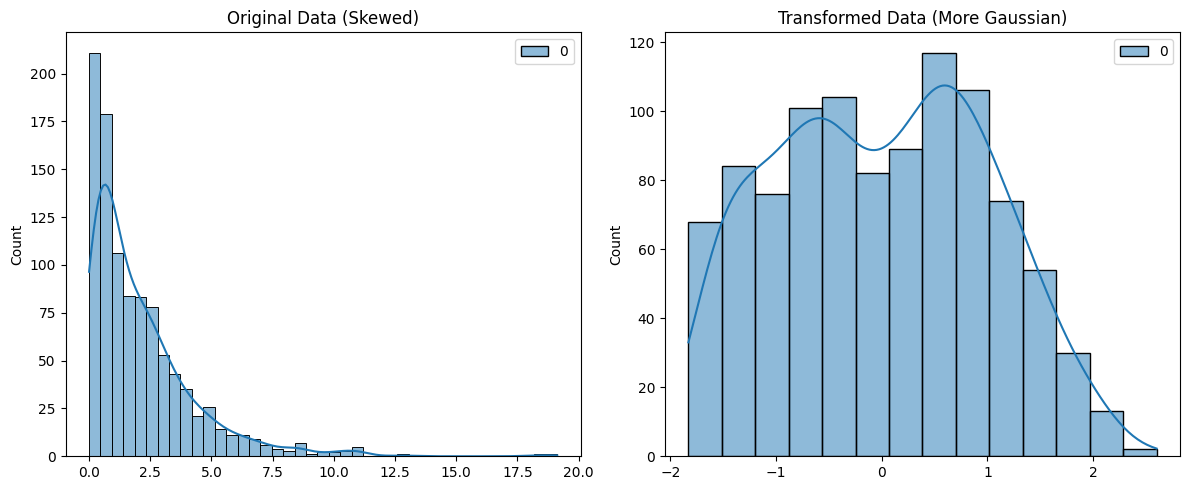

In [ ]:
from sklearn.preprocessing import PowerTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate some skewed data
data = np.random.exponential(scale=2, size=1000).reshape(-1, 1)

# Initialize the PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit and transform the data
data_transformed = pt.fit_transform(data)

# Plot original and transformed data
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data, kde=True, ax=axes[0])
axes[0].set_title('Original Data (Skewed)')

sns.histplot(data_transformed, kde=True, ax=axes[1])
axes[1].set_title('Transformed Data (More Gaussian)')

plt.tight_layout()
plt.show()

### How to Apply `PowerTransformer` to Your Own Dataset

Applying `PowerTransformer` to your dataset follows a standard scikit-learn preprocessing pattern. The key is to `fit` the transformer *only* on your training data to prevent data leakage, and then use the *fitted* transformer to `transform` both your training and testing (or new unseen) data.

Here are the general steps:

1.  **Load Your Data**: First, you need to load your dataset into a pandas DataFrame or a NumPy array.

2.  **Split Data (Training/Testing)**: If you're building a machine learning model, it's crucial to split your data into training and testing sets *before* applying any transformations. This ensures that the transformation parameters (like the optimal $\lambda$) are learned only from the training data.

3.  **Identify Features to Transform**: Determine which columns (features) in your dataset you want to apply the power transformation to. It's usually applied to numerical features that are skewed.

4.  **Instantiate `PowerTransformer`**: Create an instance of the `PowerTransformer`. You can specify the `method` (`'yeo-johnson'` or `'box-cox'`) and whether to `standardize` the output.

5.  **Fit on Training Data**: Call the `fit()` method of the `PowerTransformer` instance on your *training data*. This step calculates the optimal $\lambda$ value(s) for each feature based on the training data's distribution.

6.  **Transform Training and Test Data**: Use the `transform()` method of the *fitted* `PowerTransformer` to apply the learned transformation to both your training and testing data. You should *not* refit the transformer on the test data.

    *   For training data, you can use `fit_transform()` as a shortcut.
    *   For test data, always use `transform()`.

7.  **Integrate with Pipeline (Optional but Recommended)**: For more robust and reproducible workflows, integrate `PowerTransformer` into a scikit-learn `Pipeline`.

Below is a code example demonstrating these steps.

Original training data shape: (700, 3)
Original testing data shape: (300, 3)

Transformed training data shape: (700, 3)
Transformed testing data shape: (300, 3)

First 5 rows of original training data:


,feature_exp,feature_lognorm,feature_neg
541,1.863695,1.698410,4.899738
440,0.177308,0.304953,4.932048
482,1.212256,1.713873,4.305645
422,0.191274,1.130090,4.982292
778,2.546192,4.449041,3.954441



First 5 rows of transformed training data:


,feature_exp,feature_lognorm,feature_neg
541,0.342453,0.453096,1.191320
440,-1.421217,-1.338130,1.258500
482,-0.111020,0.463517,0.121424
422,-1.393793,-0.022010,1.364939
778,0.686401,1.439932,-0.377325


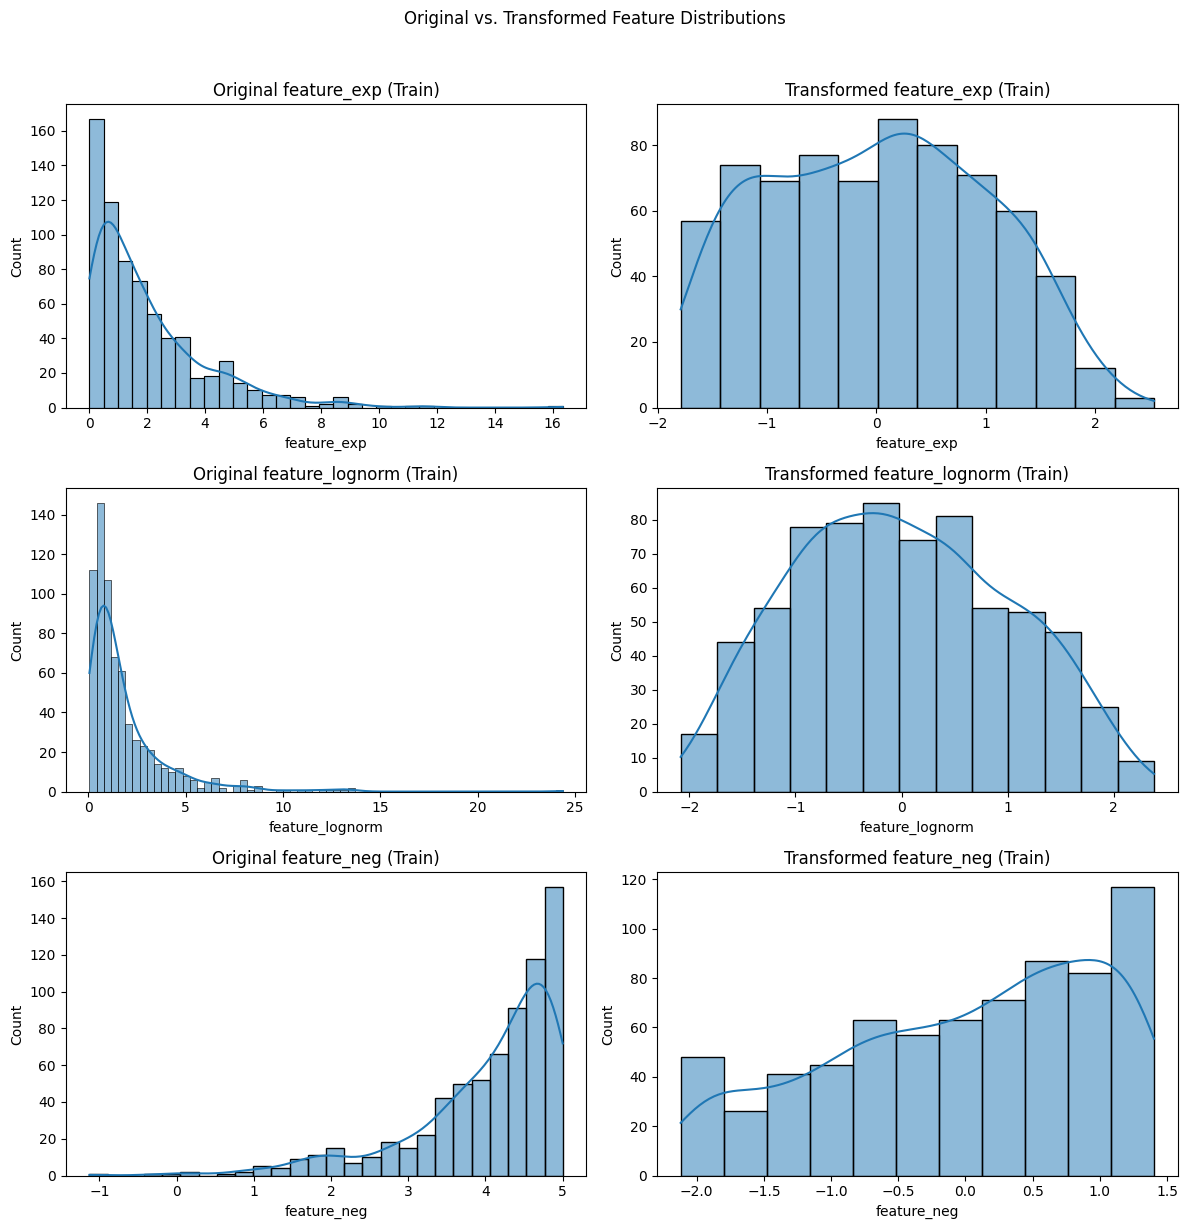

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Generate or load your own skewed data
# For demonstration, let's create a DataFrame with multiple skewed features
np.random.seed(42)
data_size = 1000

df = pd.DataFrame({
    'feature_exp': np.random.exponential(scale=2, size=data_size),
    'feature_lognorm': np.random.lognormal(mean=0, sigma=1, size=data_size),
    'feature_neg': -np.random.exponential(scale=1, size=data_size) + 5, # Example with negative values
    'target': np.random.rand(data_size) # A dummy target variable
})

# 2. Split data into training and testing sets
# We'll split the features (X) and target (y)
X = df[['feature_exp', 'feature_lognorm', 'feature_neg']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Original training data shape:", X_train.shape)
print("Original testing data shape:", X_test.shape)

# 3. Instantiate PowerTransformer
# We'll use yeo-johnson as it handles positive, zero, and negative values
pt = PowerTransformer(method='yeo-johnson', standardize=True)

# 4. Fit on training data and transform training data
X_train_transformed = pt.fit_transform(X_train)

# Convert back to DataFrame for easier inspection (optional)
X_train_transformed_df = pd.DataFrame(
X_train_transformed,
    columns=X_train.columns,
    index=X_train.index
)

# 5. Transform testing data (DO NOT FIT AGAIN)
X_test_transformed = pt.transform(X_test)

# Convert back to DataFrame for easier inspection (optional)
X_test_transformed_df = pd.DataFrame(
    X_test_transformed,
    columns=X_test.columns,
    index=X_test.index
)

print("\nTransformed training data shape:", X_train_transformed.shape)
print("Transformed testing data shape:", X_test_transformed.shape)

print("\nFirst 5 rows of original training data:")
display(X_train.head())

print("\nFirst 5 rows of transformed training data:")
display(X_train_transformed_df.head())

# Optional: Visualize original vs. transformed distributions for one feature
fig, axes = plt.subplots(len(X.columns), 2, figsize=(12, 4 * len(X.columns)))
fig.suptitle('Original vs. Transformed Feature Distributions', y=1.02)

for i, col in enumerate(X.columns):
    # Original
    sns.histplot(X_train[col], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Original {col} (Train)')

    # Transformed
    sns.histplot(X_train_transformed_df[col], kde=True, ax=axes[i, 1])
    axes[i, 1].set_title(f'Transformed {col} (Train)')

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as statsa

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score


In [3]:
df=pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [9]:
df.isnull()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


#Finding Values are negative or zero if it has then box pox are not used in these datasets

In [11]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [13]:
X=df.drop(columns=['Strength'],axis=1)
y=df.iloc[:,-1]

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Applying Regression without any transformation

In [15]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.627553179231485

#Cross Checking with cross val score

In [16]:
lr=LinearRegression()
np.mean(cross_val_predict(lr,X,y,cv=10))

np.float64(35.84894490151616)

#Plotting the distplot without any transformer

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


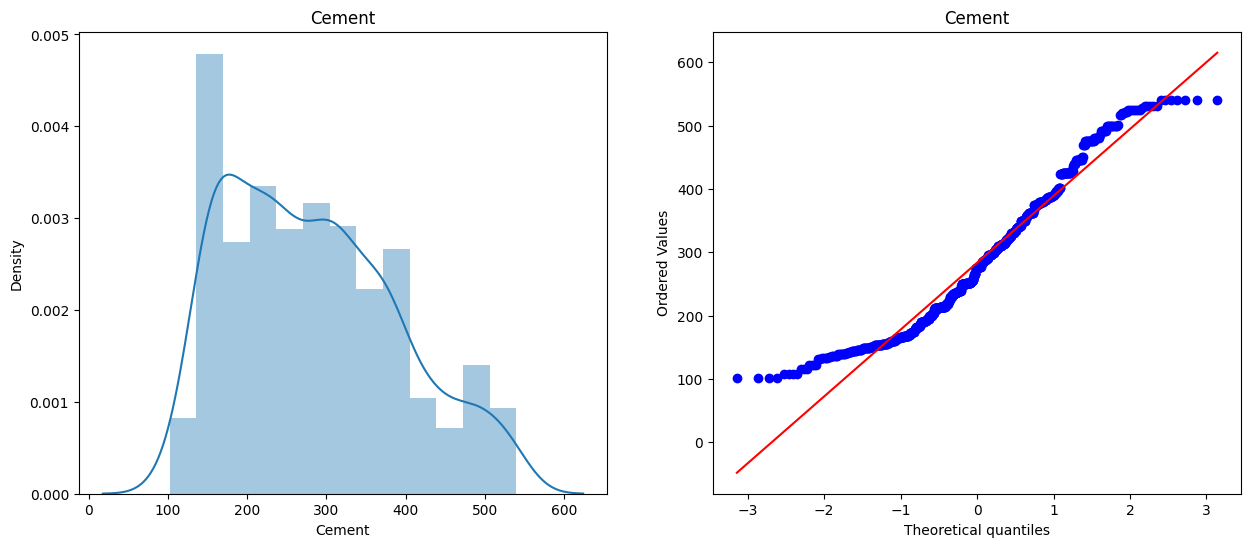

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


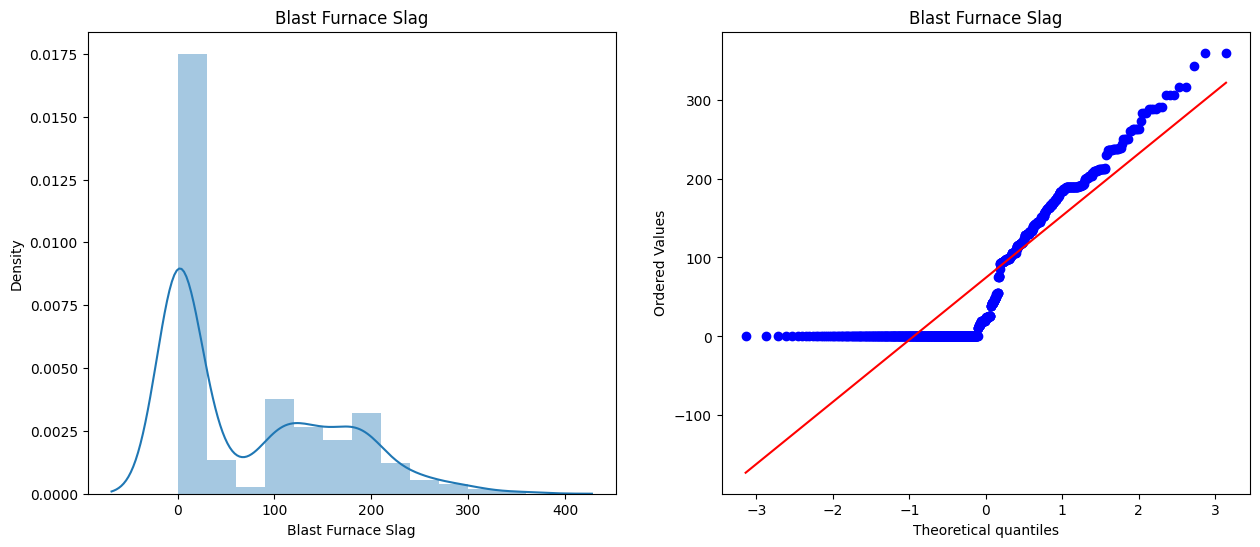

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


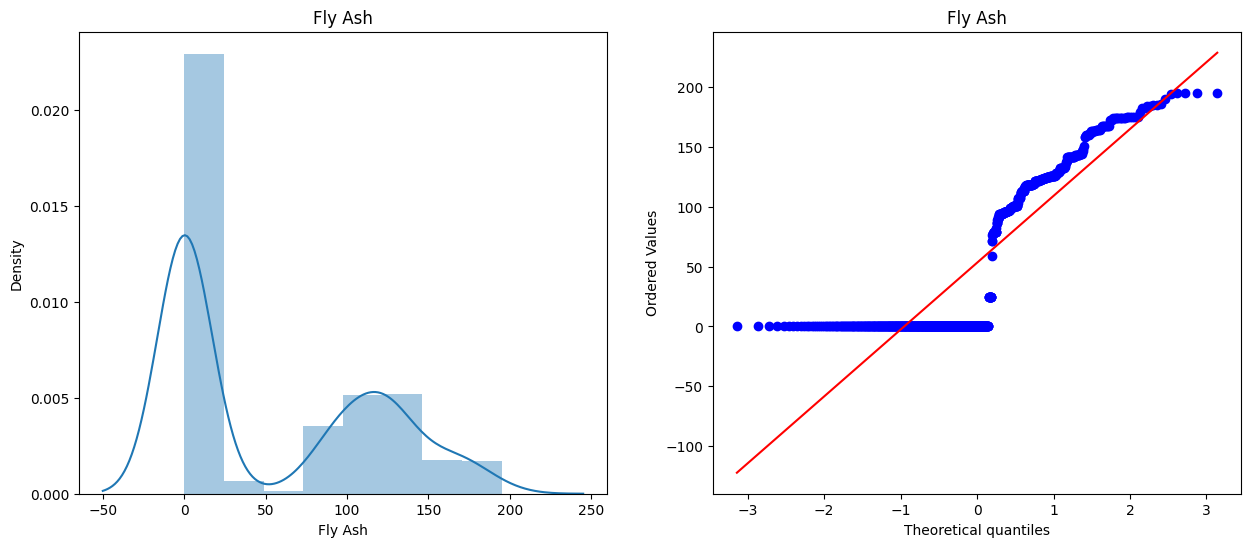

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


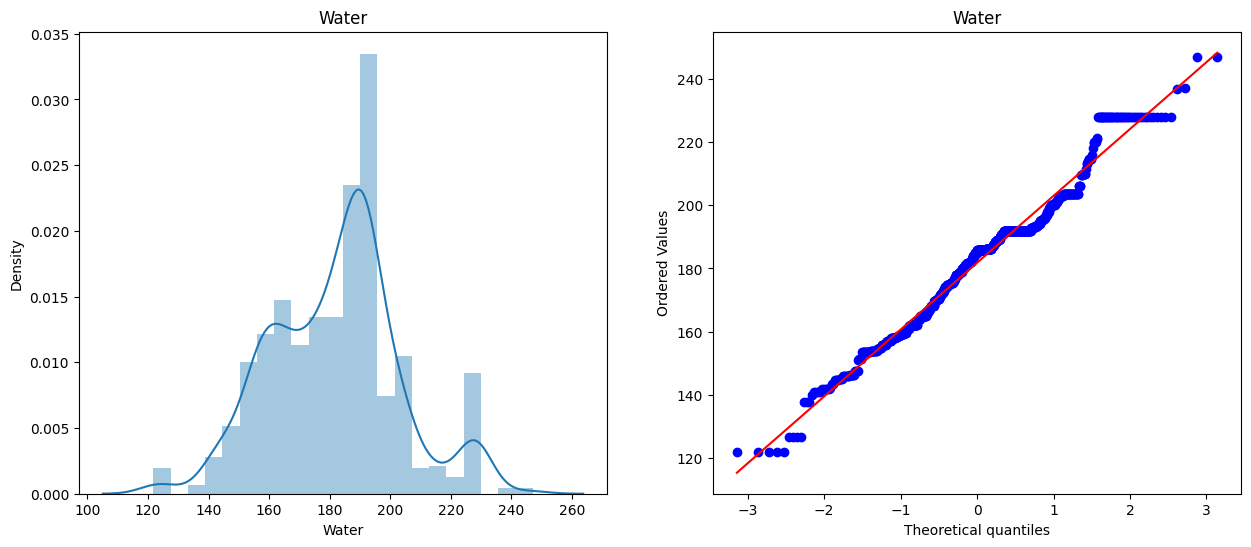

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


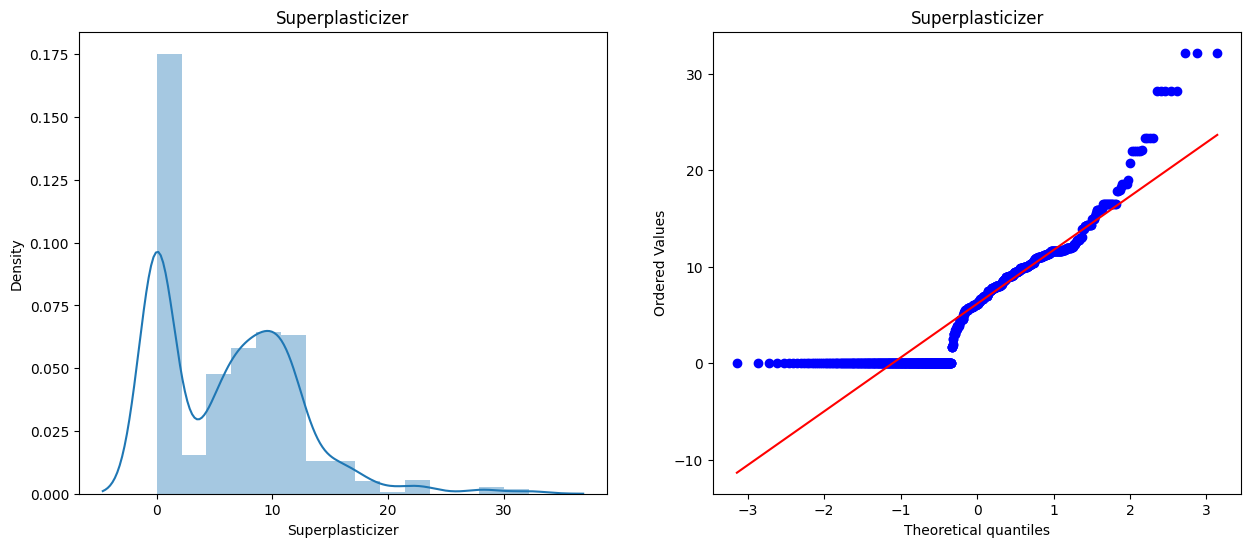

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


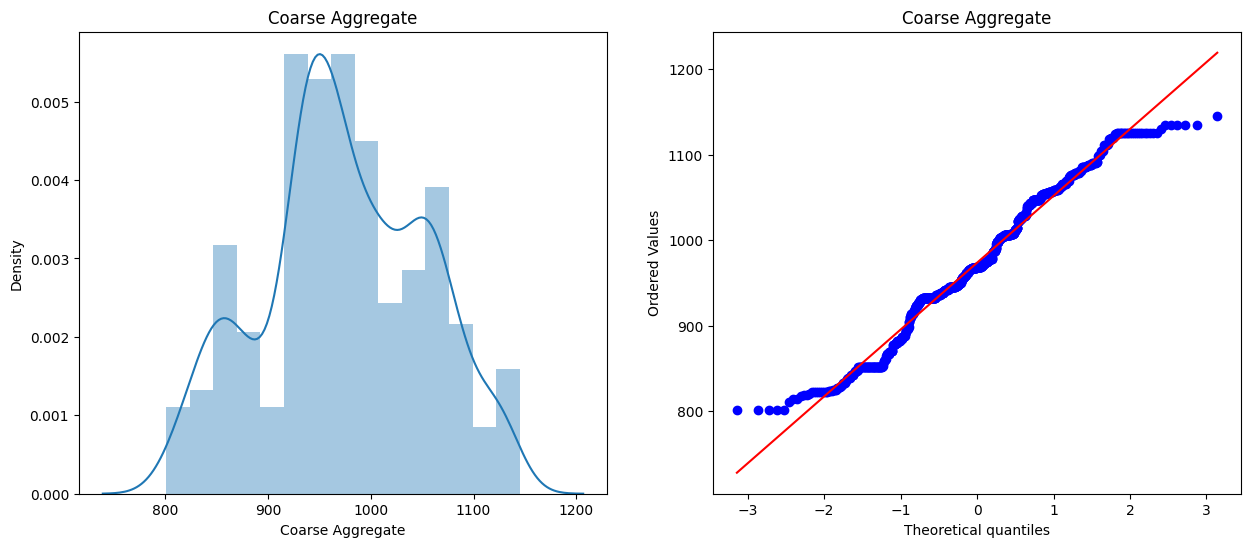

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


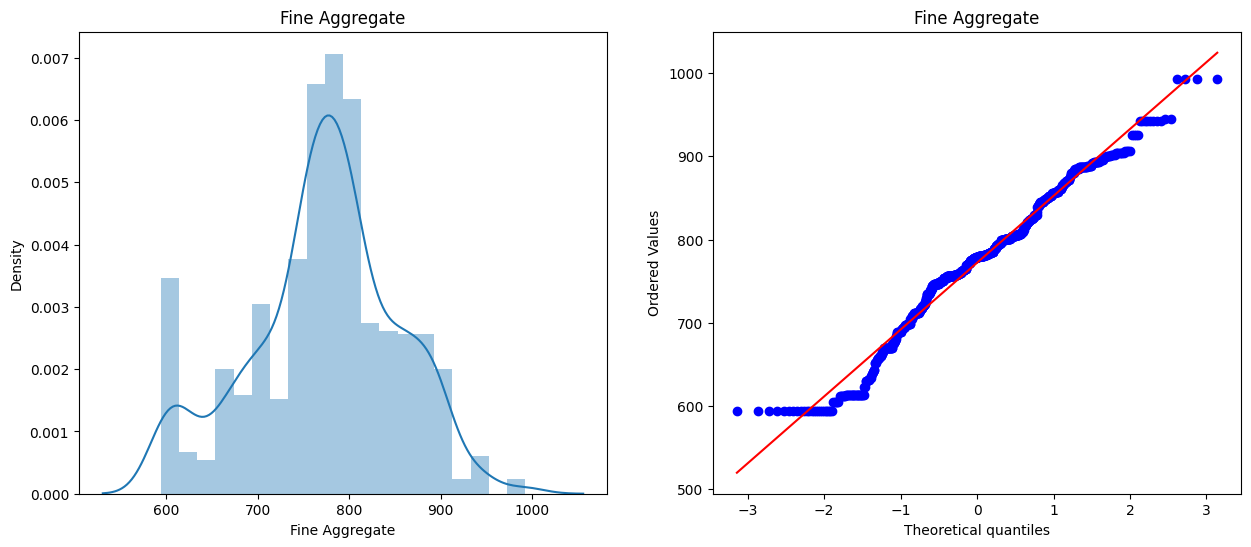

/tmp/ipython-input-1291881202.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[col])


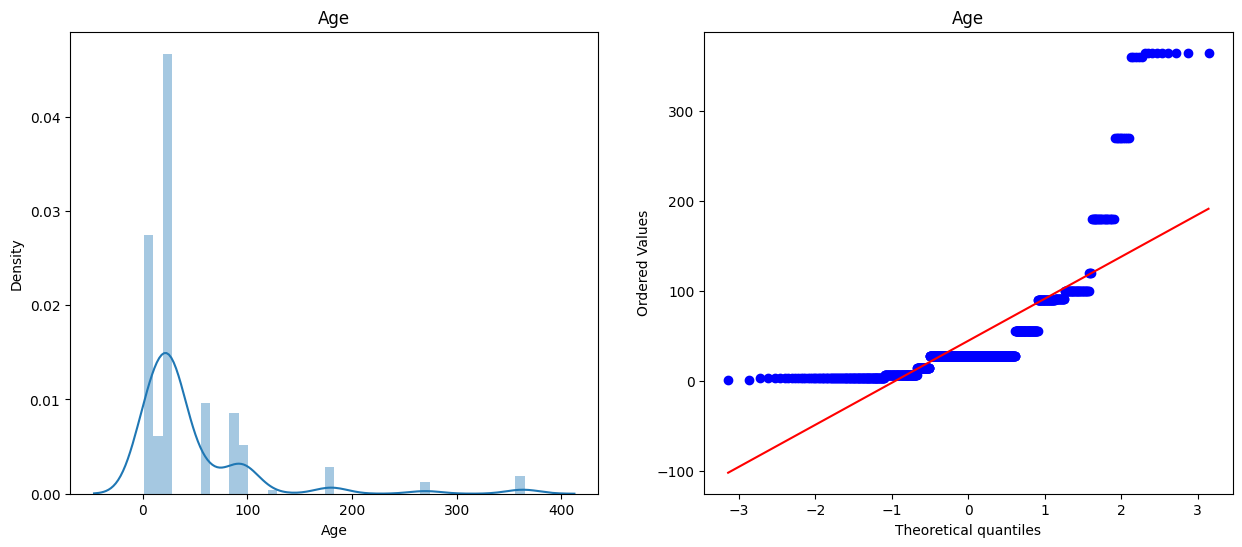

In [17]:
for col in X_train.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(1,2,2)
    statsa.probplot(X_train[col],dist='norm',plot=plt)
    plt.title(col)
    plt.show()

#Applying Box-Cox Transform

In [22]:
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+.000001)
X_test_transformed=pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_xox_lambdas':pt.lambdas_})

,cols,box_xox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


### Explanation of the `PowerTransformer` with Box-Cox Application

This code block demonstrates how to apply the `PowerTransformer` with the Box-Cox method to your dataset and inspect the learned `lambda` values.

```python
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+.000001)
X_test_transformed=pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_xox_lambdas':pt.lambdas_})
```

*   **`pt=PowerTransformer(method='box-cox')`**:
    *   An instance of the `PowerTransformer` is created.
    *   `method='box-cox'` is specified, indicating that the Box-Cox transformation will be used. **Important:** This method can only be applied to strictly positive data. If your data contains zero or negative values, an error will occur unless you handle them (e.g., by adding a small constant).

*   **`X_train_transformed=pt.fit_transform(X_train+.000001)`**:
    *   The `fit_transform()` method is called on the training data (`X_train`).
    *   **`X_train+.000001`**: A very small constant (0.000001) is added to the `X_train` data. This is crucial for the Box-Cox transformation if any values in `X_train` are zero or negative, as Box-Cox is only defined for positive values. Adding a small positive number shifts all values to be strictly positive, preventing errors.
    *   During the `fit` phase, the transformer analyzes the distribution of each feature in `X_train` to determine the optimal `lambda` (transformation parameter) that best normalizes the data.
    *   During the `transform` phase, it applies this learned transformation to `X_train`.
    *   The result, `X_train_transformed`, is a NumPy array containing the transformed training features.

*   **`X_test_transformed=pt.transform(X_test+0.000001)`**:
    *   The `transform()` method is called on the test data (`X_test`).
    *   **Crucially, `fit()` is NOT called again on the test data.** This prevents data leakage from the test set into the training process.
    *   The *same* `lambda` values learned from the training data (`X_train`) are applied to the test data (`X_test+0.000001`). Again, the small constant is added to ensure all test data values are positive before transformation.
    *   `X_test_transformed` contains the transformed test features.

*   **`pd.DataFrame({'cols':X_train.columns,'box_xox_lambdas':pt.lambdas_})`**:
    *   This line creates a pandas DataFrame to display the optimal `lambda` value found for each feature during the `fit` process.
    *   `pt.lambdas_` is an attribute of the fitted `PowerTransformer` object that stores the estimated `lambda` values for each feature.
    *   By associating these `lambda` values with their corresponding column names (`X_train.columns`), it provides a clear overview of how the transformer adjusted each feature.

#Applying Linear Regression on transformed data

In [32]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred2=lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.8161906541864055

#Using cross val score

In [33]:
pt=PowerTransformer(method='box-cox')
X_train_transformed=pt.fit_transform(X_train+.000001)

lr=LinearRegression()
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr, X_train_transformed, y_train, scoring='r2', cv=10))


np.float64(0.7914577070995126)

#Box-Cox

In [40]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Power Transformer (Box-Cox)
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 1e-6)
X_test_transformed = pt.transform(X_test + 1e-6)

# Lambda values
lambda_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Lambda': pt.lambdas_
})
print(lambda_df)

# Model
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

# Prediction
y_pred = lr.predict(X_test_transformed)

# Evaluation
score = r2_score(y_test, y_pred)
print("R2 Score after Box-Cox Transformation:", score)


              Feature    Lambda
0              Cement  0.177025
1  Blast Furnace Slag  0.025093
2             Fly Ash -0.038970
3               Water  0.772682
4    Superplasticizer  0.098811
5    Coarse Aggregate  1.129813
6      Fine Aggregate  1.782018
7                 Age  0.066631
R2 Score after Box-Cox Transformation: 0.8047824993083206


#Before and After comparison for Box-Cox Plot

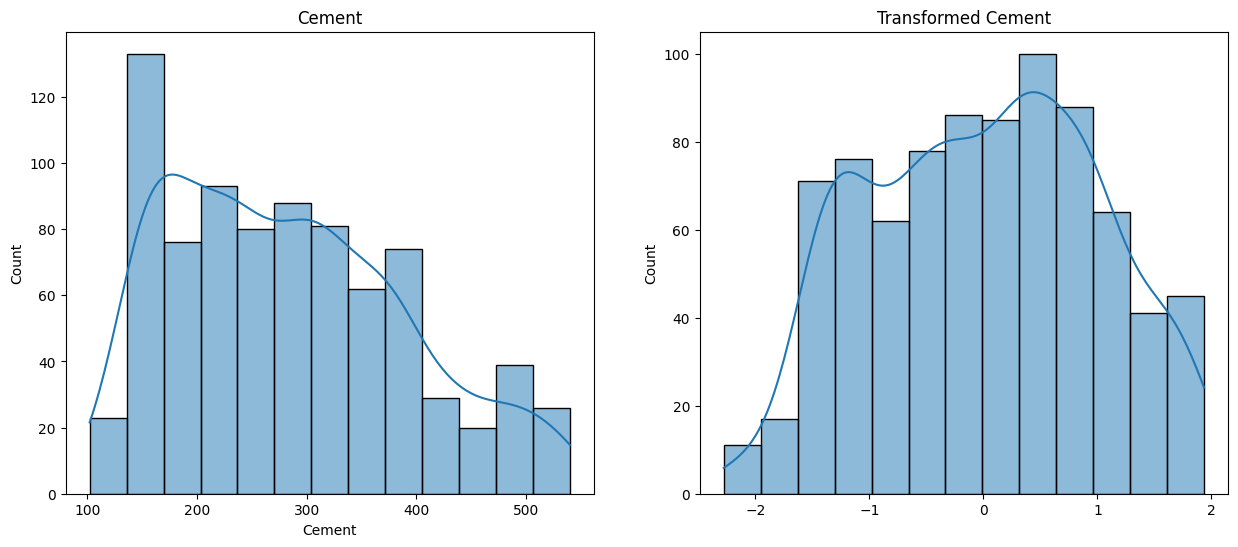

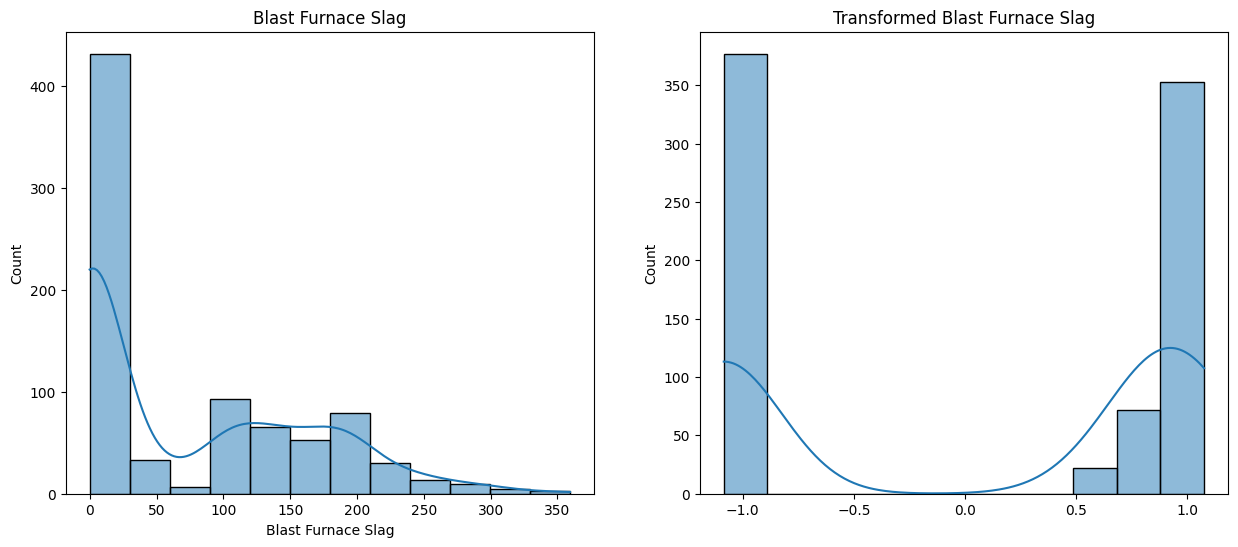

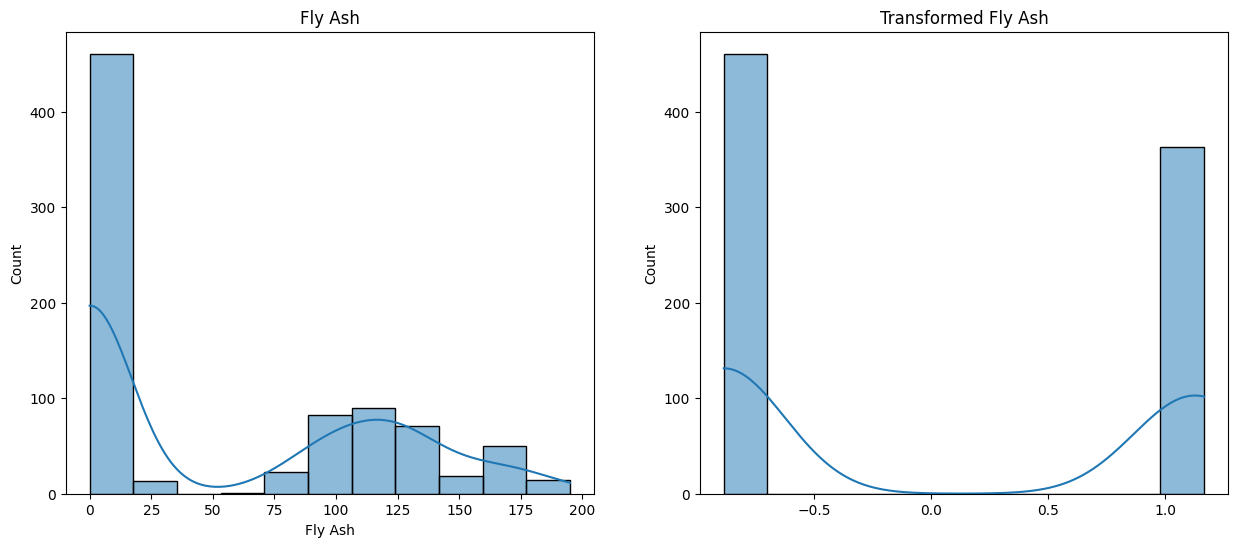

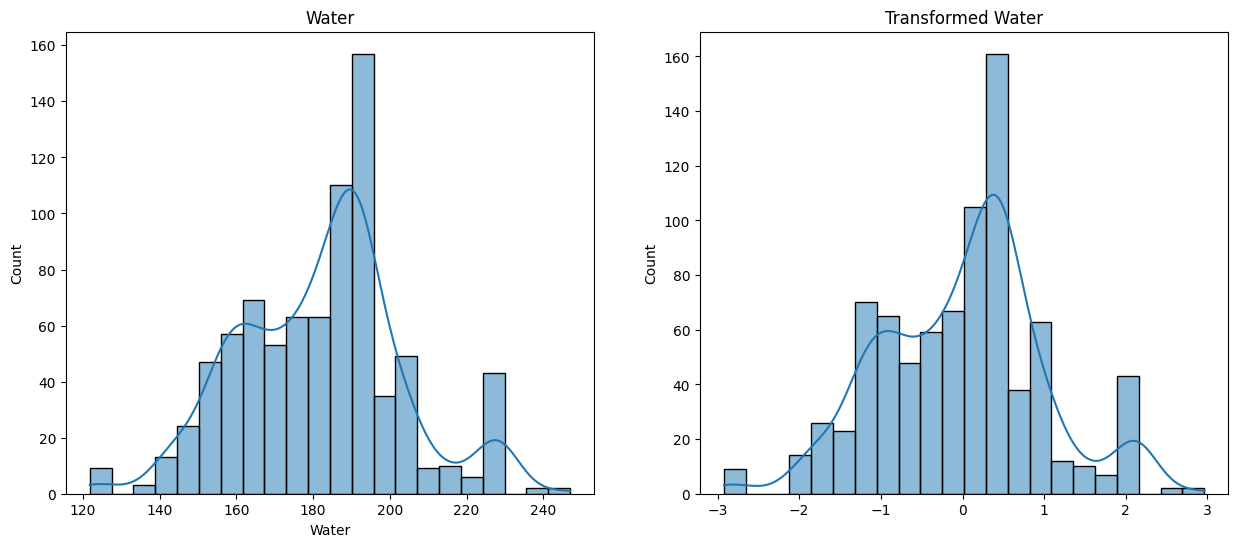

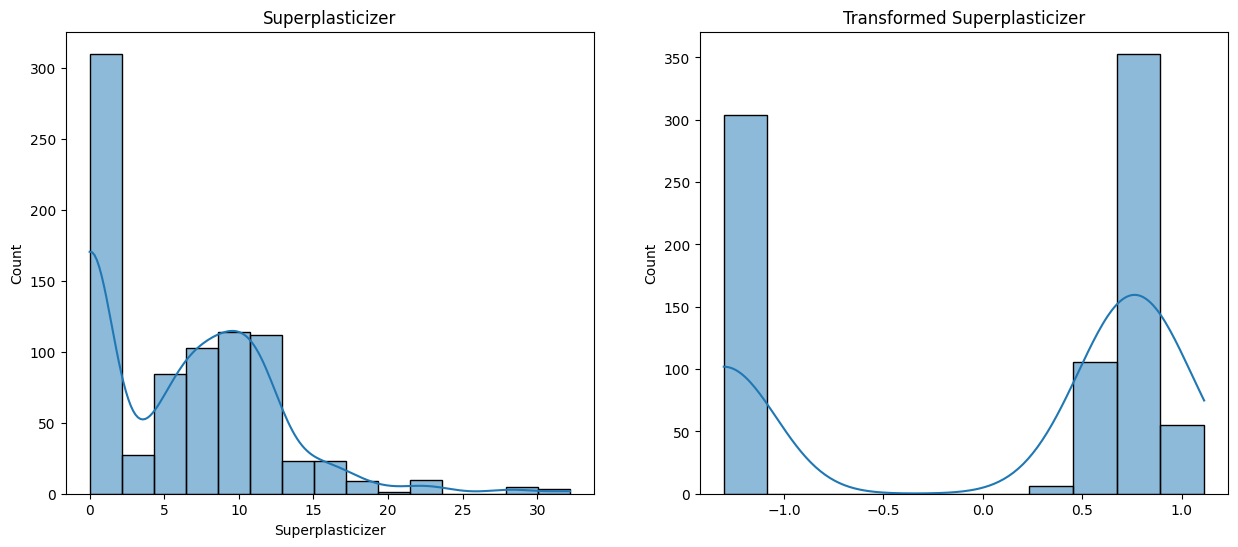

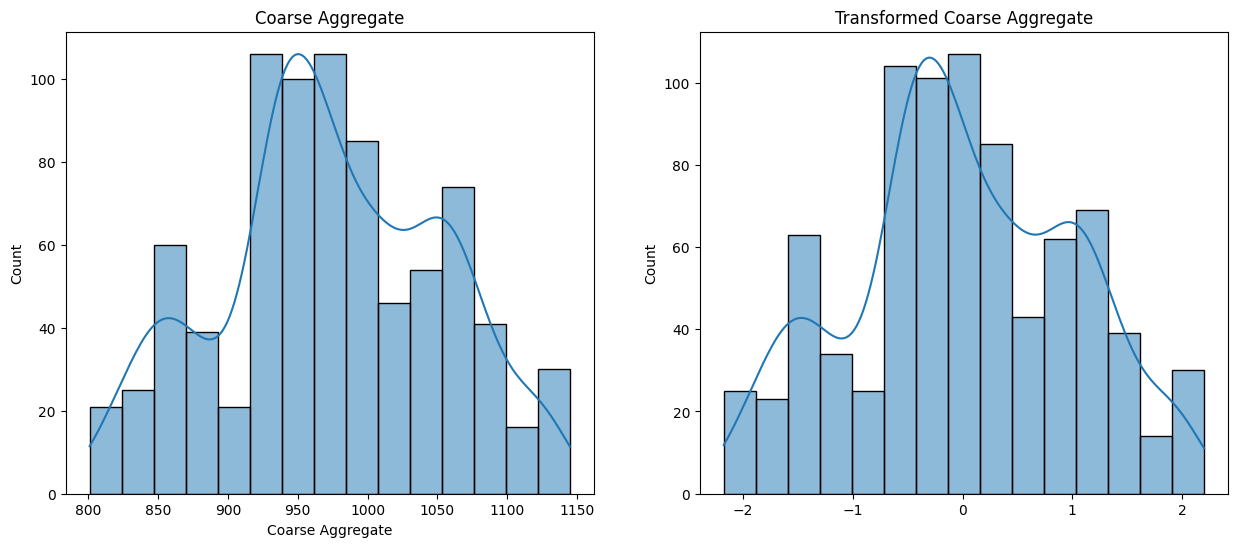

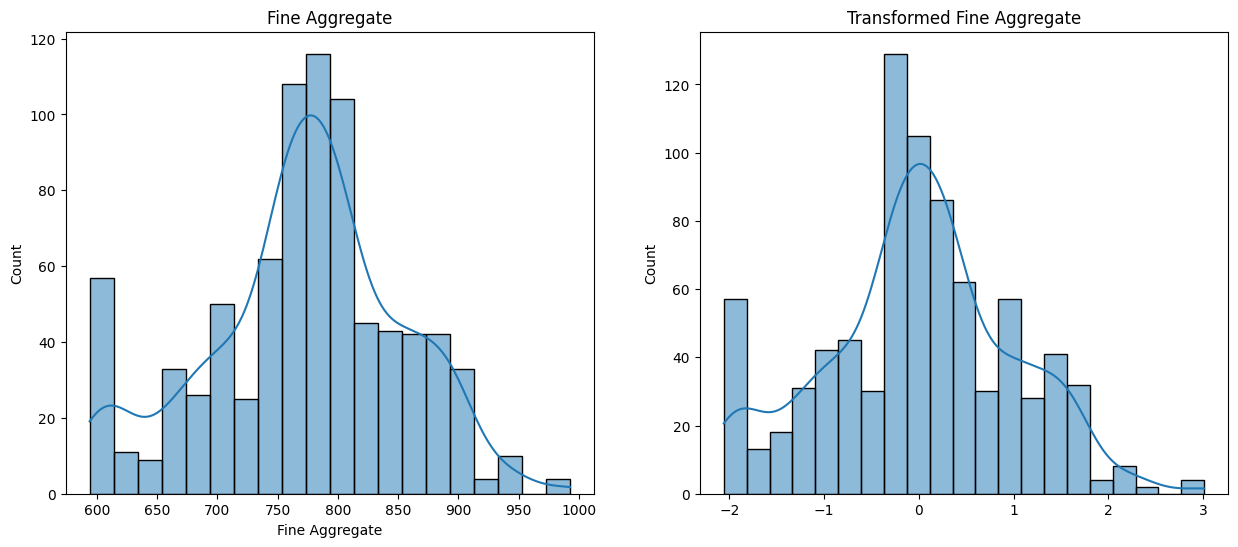

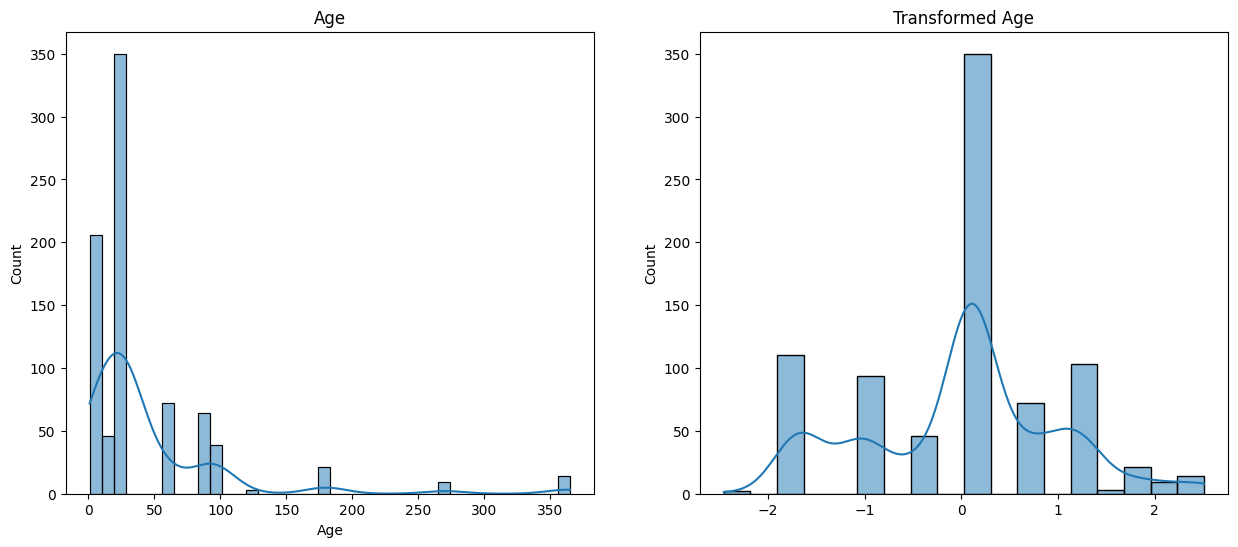

In [35]:
for i in range(X_train_transformed.shape[1]):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(X_train.iloc[:, i], kde=True)
    plt.title(X_train.columns[i])

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[:, i], kde=True)
    plt.title(f'Transformed {X_train.columns[i]}')
    plt.show()


### Explanation of the Code Block

This code block performs two main tasks after the data has been transformed using `PowerTransformer` with the Yeo-Johnson method:

1.  **Evaluates a Linear Regression Model**: It assesses the performance of a `LinearRegression` model using the transformed features.
2.  **Visualizes Feature Distributions**: It creates comparative plots to show the distributions of the original features versus their Yeo-Johnson transformed counterparts.

#### 1. Linear Regression Evaluation

```python
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred_transformed=lr.predict(X_test_transformed)
r2_transformed = r2_score(y_test,y_pred_transformed)
print(f"R2 score after Yeo-Johnson transformation: {r2_transformed}")
```

*   **`lr=LinearRegression()`**: An instance of the `LinearRegression` model from `sklearn.linear_model` is created.
*   **`lr.fit(X_train_transformed,y_train)`**: The linear regression model is trained on the `X_train_transformed` (features that have been scaled by `PowerTransformer`) and the original `y_train` (target variable).
*   **`y_pred_transformed=lr.predict(X_test_transformed)`**: The trained model then makes predictions on the `X_test_transformed` data.
*   **`r2_transformed = r2_score(y_test,y_pred_transformed)`**: The R2 score is calculated by comparing the actual `y_test` values with the `y_pred_transformed` predictions. The R2 score measures how well the model explains the variance in the target variable.
*   **`print(...)`**: The calculated R2 score is printed to the console, allowing for a quantitative assessment of the model's performance after the transformation.

#### 2. Visualization of Original vs. Transformed Distributions

```python
for i, col in enumerate(X_train.columns):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Original {col} Distribution')

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[:, i], kde=True)
    plt.title(f'Transformed {col} Distribution (Yeo-Johnson)')
    plt.show()
```

This loop iterates through each feature (`col`) in your original training data (`X_train`):

*   **`plt.figure(figsize=(15,6))`**: A new figure is created for each feature to display its original and transformed distributions side-by-side.
*   **`plt.subplot(1,2,1)`**: The first subplot is created to show the original distribution.
*   **`sns.histplot(X_train[col], kde=True)`**: A histogram with a Kernel Density Estimate (KDE) is plotted for the original feature data from `X_train`.
*   **`plt.title(f'Original {col} Distribution')`**: A title indicating 'Original Distribution' is added.
*   **`plt.subplot(1,2,2)`**: The second subplot is created to show the transformed distribution.
*   **`sns.histplot(X_train_transformed[:, i], kde=True)`**: A histogram with a KDE is plotted for the corresponding transformed feature data from `X_train_transformed`. The `[:, i]` slicing is used to select all rows for the current feature `i`.
*   **`plt.title(f'Transformed {col} Distribution (Yeo-Johnson)')`**: A title indicating 'Transformed Distribution (Yeo-Johnson)' is added.
*   **`plt.show()`**: Displays the plot for the current feature. This process repeats for all features, allowing for a visual comparison of how the Yeo-Johnson transformation has altered the distribution of each feature, ideally making them more Gaussian.

#Applying yeo-jhonson Transform

In [23]:
pt=PowerTransformer(method='yeo-johnson')
X_train_transformed=pt.fit_transform(X_train+.000001)
X_test_transformed=pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_xox_lambdas':pt.lambdas_})

,cols,box_xox_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


### Explanation of the `PowerTransformer` Application

This code block demonstrates how to apply the `PowerTransformer` with the Yeo-Johnson method to your dataset and inspect the learned `lambda` values.

```python
pt=PowerTransformer(method='yeo-johnson')
X_train_transformed=pt.fit_transform(X_train+.000001)
X_test_transformed=pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_xox_lambdas':pt.lambdas_})
```

*   **`pt=PowerTransformer(method='yeo-johnson')`**:
    *   An instance of the `PowerTransformer` is created.
    *   `method='yeo-johnson'` is specified, indicating that the Yeo-Johnson transformation will be used. This method is preferred over Box-Cox when your data contains zero or negative values, as it can handle all types of real numbers.

*   **`X_train_transformed=pt.fit_transform(X_train+.000001)`**:
    *   The `fit_transform()` method is called on the training data (`X_train`).
    *   **`X_train+.000001`**: A very small constant (0.000001) is added to the `X_train` data. This is a common practice when dealing with power transformations, especially if there's a possibility of zero values, although Yeo-Johnson is designed to handle zeros directly. Sometimes adding a tiny epsilon can prevent potential numerical instability or edge cases with very small numbers, even if not strictly required by the Yeo-Johnson formula itself for non-negative values.
    *   During the `fit` phase, the transformer analyzes the distribution of each feature in `X_train` to determine the optimal `lambda` (transformation parameter) that best normalizes the data.
    *   During the `transform` phase, it applies this learned transformation to `X_train`.
    *   The result, `X_train_transformed`, is a NumPy array containing the transformed training features.

*   **`X_test_transformed=pt.transform(X_test+0.000001)`**:
    *   The `transform()` method is called on the test data (`X_test`).
    *   **Crucially, `fit()` is NOT called again on the test data.** This prevents data leakage from the test set into the training process.
    *   The *same* `lambda` values learned from the training data (`X_train`) are applied to the test data (`X_test+0.000001`).
    *   `X_test_transformed` contains the transformed test features.

*   **`pd.DataFrame({'cols':X_train.columns,'box_xox_lambdas':pt.lambdas_})`**:
    *   This line creates a pandas DataFrame to display the optimal `lambda` value found for each feature during the `fit` process.
    *   `pt.lambdas_` is an attribute of the fitted `PowerTransformer` object that stores the estimated `lambda` values for each feature.
    *   By associating these `lambda` values with their corresponding column names (`X_train.columns`), it provides a clear overview of how the transformer adjusted each feature.

#Apply Yeo-Jhonson Transform

In [39]:
pt2=PowerTransformer()
X_train_transformed2=pt2.fit_transform(X_train)
X_test_transformed2=pt2.transform(X_test)

lr=LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred3=lr.predict(X_test_transformed2)
print(r2_score(y_test,y_pred3))


pd.DataFrame({'cols':X_train.columns,'Ye_Jhonson_lambdas':pt2.lambdas_})

0.8161906512004999


,cols,Ye_Jhonson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


R2 score after Yeo-Johnson transformation: 0.8161906512004999


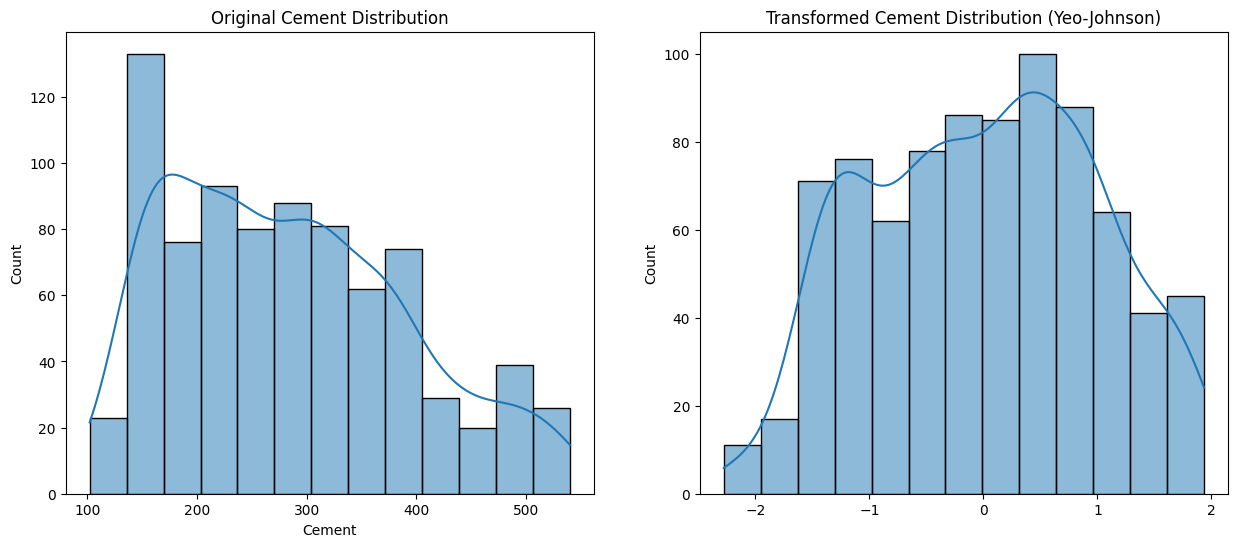

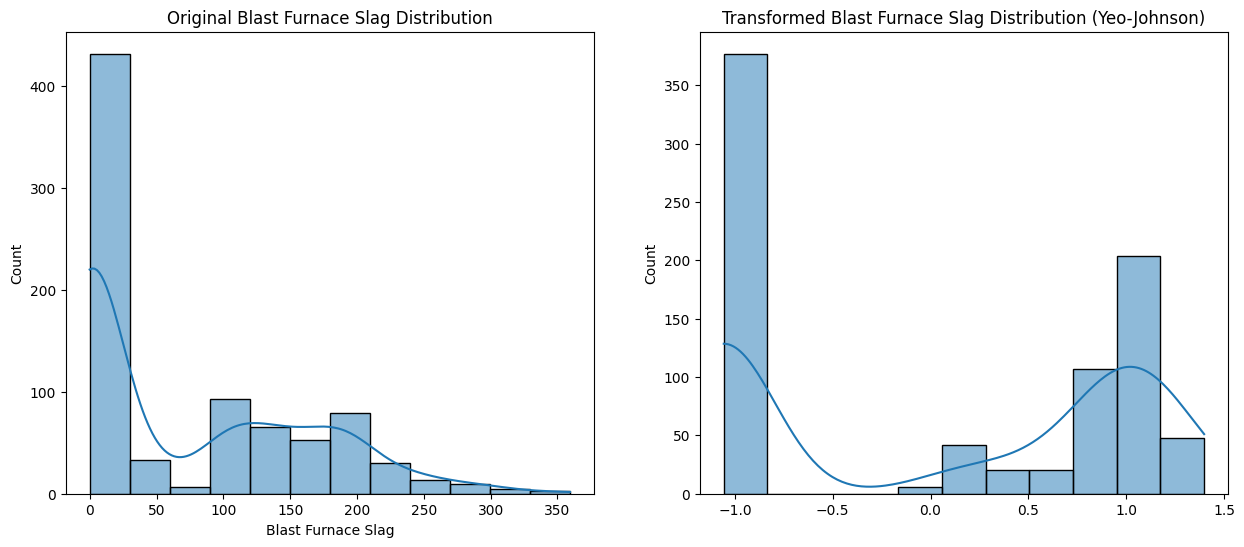

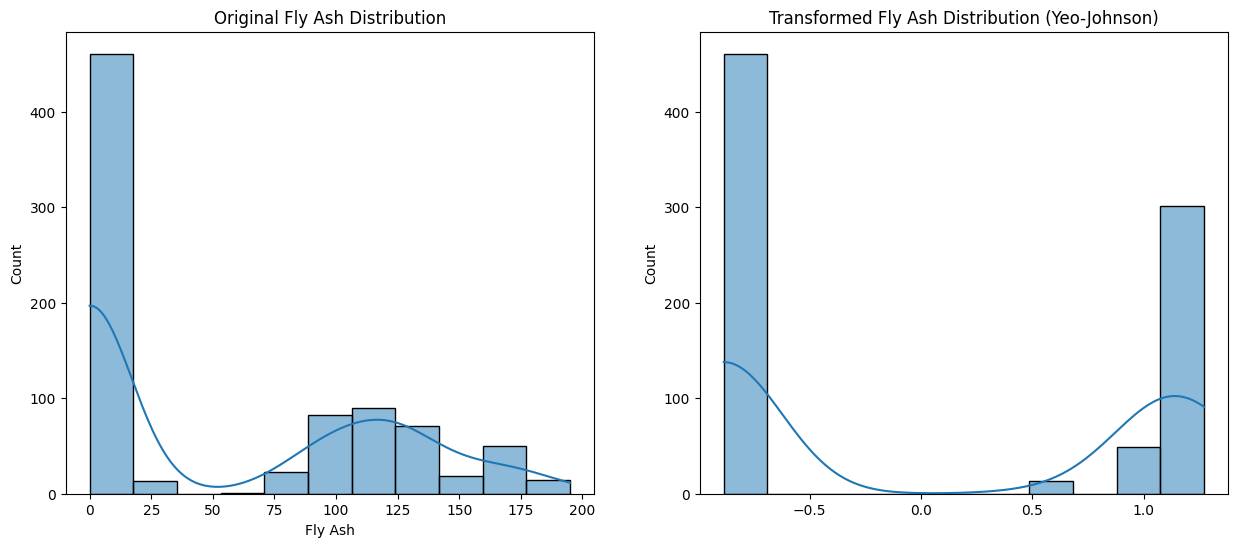

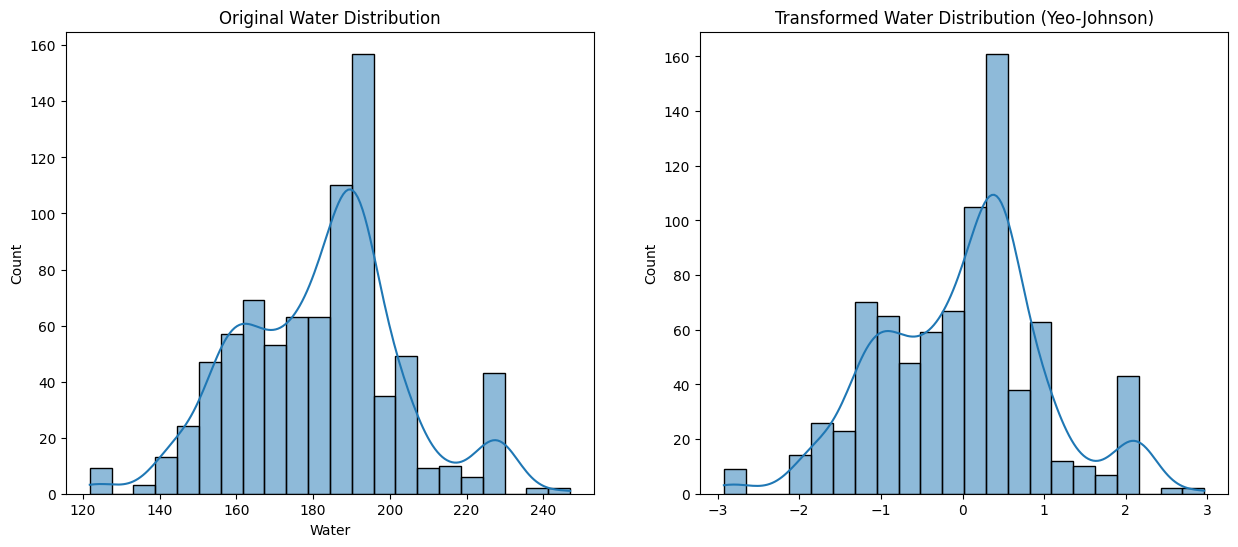

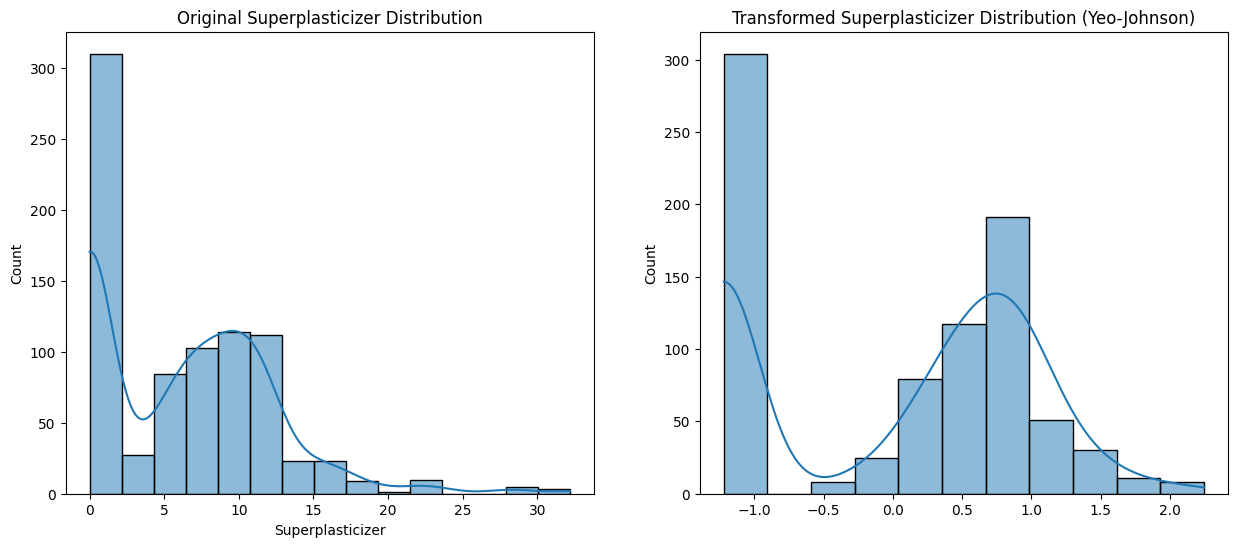

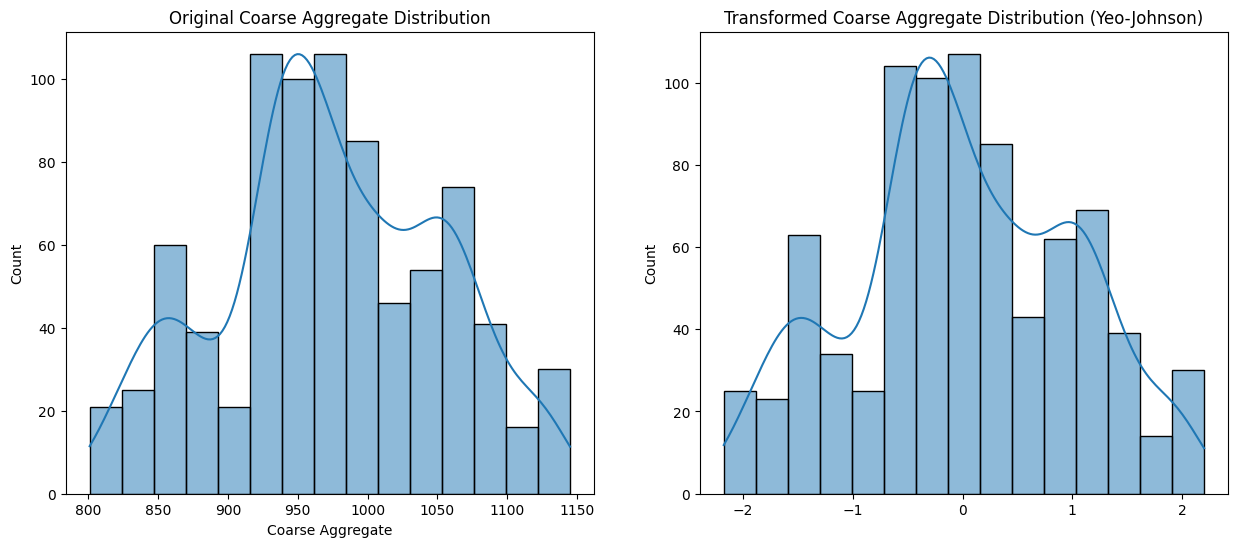

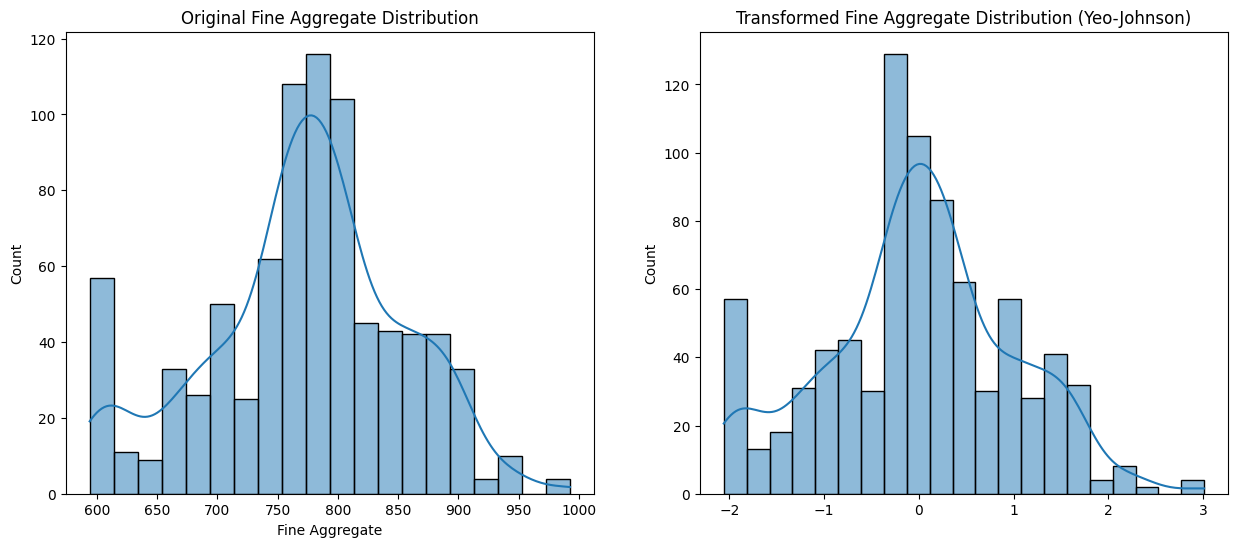

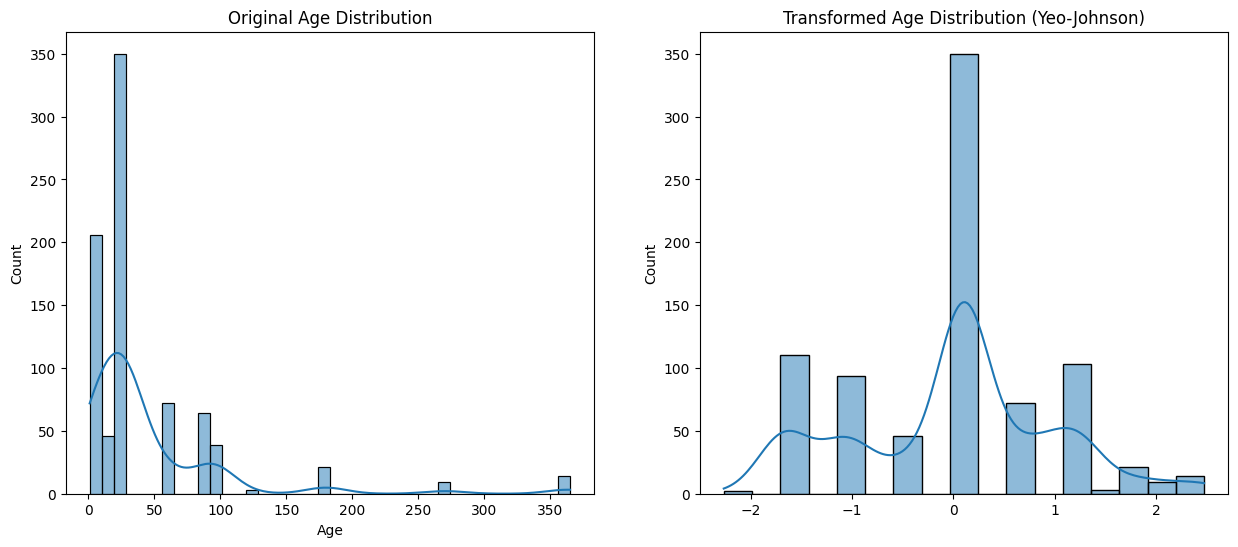

In [20]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred_transformed=lr.predict(X_test_transformed)
r2_transformed = r2_score(y_test,y_pred_transformed)
print(f"R2 score after Yeo-Johnson transformation: {r2_transformed}")

# Visualize original vs. transformed distributions for all features
for i, col in enumerate(X_train.columns):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Original {col} Distribution')

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[:, i], kde=True)
    plt.title(f'Transformed {col} Distribution (Yeo-Johnson)')
    plt.show()


In [41]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Yeo-Johnson Power Transformer
pt = PowerTransformer(method='yeo-johnson')

X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

# Lambda values
pd.DataFrame({
    'cols': X_train.columns,
    'yeo_johnson_lambdas': pt.lambdas_
})


,cols,yeo_johnson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [42]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

# Prediction
y_pred = lr.predict(X_test_transformed)

# R2 Score
r2_score(y_test, y_pred)


0.8161906512004999

#Cross val score

In [43]:
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

lr = LinearRegression()

cv_scores = cross_val_score(lr, X_transformed, y, cv=5, scoring='r2')

print("Cross Validation R2 Scores:", cv_scores)
print("Mean CV R2 Score:", cv_scores.mean())


Cross Validation R2 Scores: [0.73026967 0.69469076 0.76110355 0.82725833 0.40399026]
Mean CV R2 Score: 0.6834625141500866


In [44]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

# Box-Cox (only for positive data)
pt_boxcox = PowerTransformer(method='box-cox')
X_boxcox = pt_boxcox.fit_transform(X_train + 1e-6)

boxcox_df = pd.DataFrame({
    'Feature': X_train.columns,
    'BoxCox_Lambda': pt_boxcox.lambdas_
})

# Yeo-Johnson (works with zero & negative)
pt_yeojohnson = PowerTransformer(method='yeo-johnson')
X_yeojohnson = pt_yeojohnson.fit_transform(X_train)

yeojohnson_df = pd.DataFrame({
    'Feature': X_train.columns,
    'YeoJohnson_Lambda': pt_yeojohnson.lambdas_
})

# Merge both for comparison
comparison_df = pd.merge(boxcox_df, yeojohnson_df, on='Feature')

comparison_df


,Feature,BoxCox_Lambda,YeoJohnson_Lambda
0,Cement,0.177025,0.174348
1,Blast Furnace Slag,0.025093,0.015715
2,Fly Ash,-0.038970,-0.161447
3,Water,0.772682,0.771307
4,Superplasticizer,0.098811,0.253935
5,Coarse Aggregate,1.129813,1.130050
6,Fine Aggregate,1.782018,1.783100
7,Age,0.066631,0.019885
